# ResNet18

In [1]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from scripts import *
from second_scripts import *


### I. Data Prepration

In [2]:
# Read the data
# data_path = './data'
data_path = './DLCV_SS25_Dataset'  
images, labels = data_reader2(data_path)


In [3]:
num_classes = len(os.listdir(data_path))
num_classes

5

In [4]:
len(images)

2351

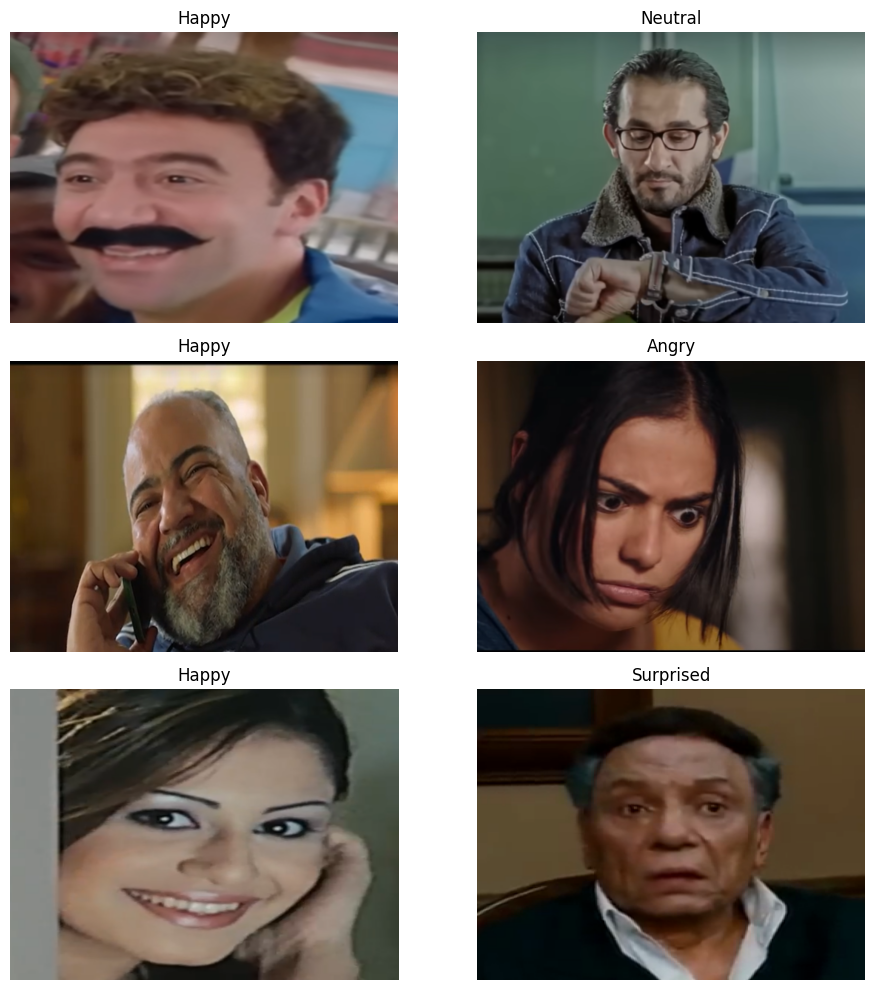

In [5]:
# View 4 random images and their titles
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple, label_to_index = data_preperator2((images, labels))
index_to_label = {v: k for k, v in label_to_index.items()}

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((1645, 512, 512, 3),
 (1645,),
 (470, 512, 512, 3),
 (470,),
 (236, 512, 512, 3),
 (236,))

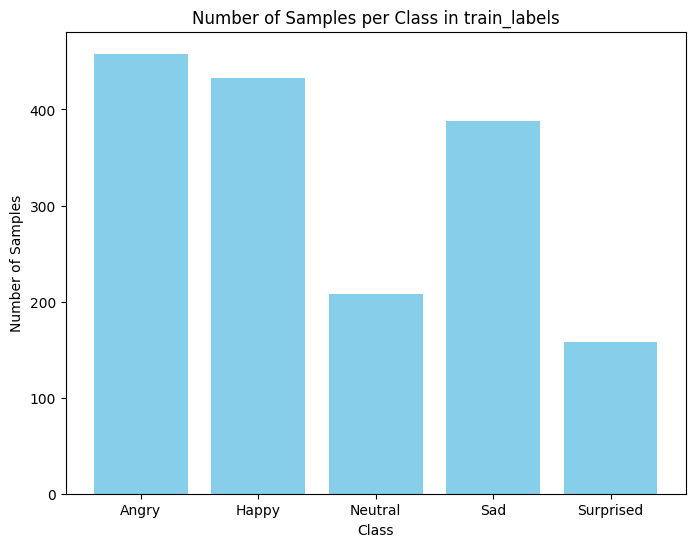

In [7]:
draw_barchart_labels(train_labels, label_to_index)

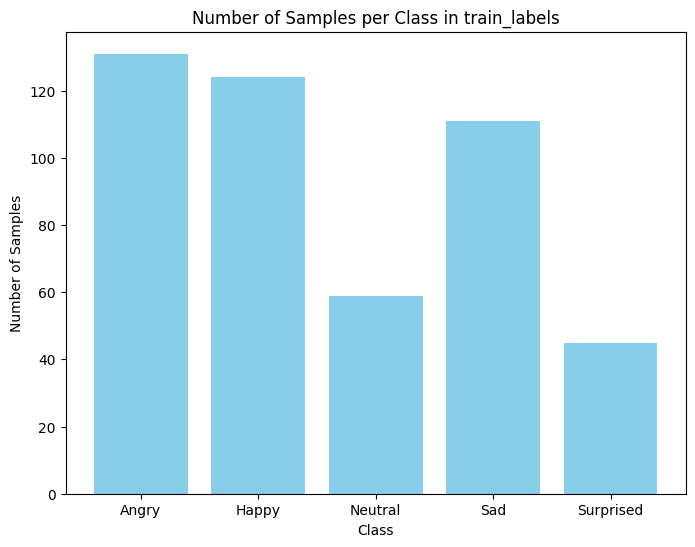

In [8]:
draw_barchart_labels(val_labels, label_to_index)

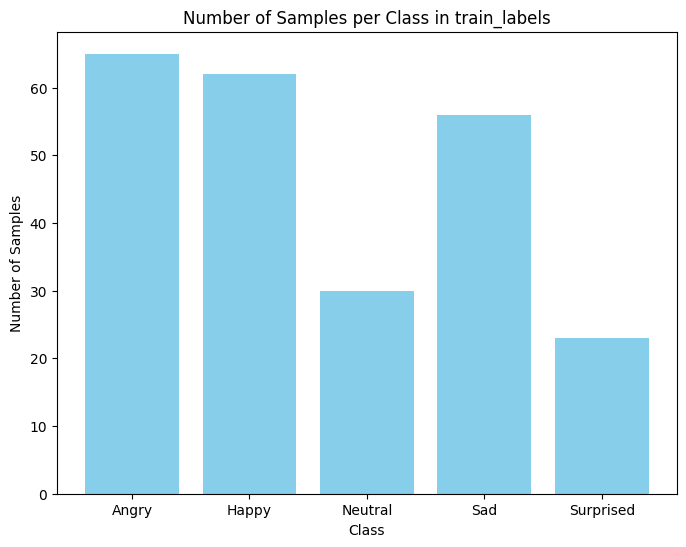

In [9]:
draw_barchart_labels(test_labels, label_to_index)

### Pretrained Model

#### ResNet18

In [18]:
import torchvision.models as models
from torch import nn
from torchvision import transforms

model = get_pretrained_model(model_name="resnet18", num_classes=5)

# Resize and normalize the images for pretrained models like ResNet
transform = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_loader_pretrained = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, transform=transform, shuffle=True)
val_loader_pretrained = convert_to_dataloader(data=(val_data, val_labels), batch_size=32, transform=transform, shuffle=False)
test_loader_pretrained = convert_to_dataloader(data=(test_data, test_labels), batch_size=32, transform=transform, shuffle=False)

c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader_pretrained, val_loader_pretrained, criterion, optimizer, num_epochs)



Epoch [1/20]
train_loss: 0.0490, train_acc: 0.2960


val_Loss: 1.4460  val_Acc: 0.3766  val_Prec: 0.2940  val_Rec: 0.3149  val_F1: 0.3004  val_ROC-AUC: 0.6651
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0424, train_acc: 0.4353


val_Loss: 1.3796  val_Acc: 0.4000  val_Prec: 0.2835  val_Rec: 0.3042  val_F1: 0.2680  val_ROC-AUC: 0.7081
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0395, train_acc: 0.4845


val_Loss: 1.3470  val_Acc: 0.4170  val_Prec: 0.4030  val_Rec: 0.3259  val_F1: 0.3020  val_ROC-AUC: 0.7283
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0375, train_acc: 0.5064


val_Loss: 1.3465  val_Acc: 0.4255  val_Prec: 0.4719  val_Rec: 0.3388  val_F1: 0.3213  val_ROC-AUC: 0.7360
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0362, train_acc: 0.5465


val_Loss: 1.3082  val_Acc: 0.4489  val_Prec: 0.4446  val_Rec: 0.3694  val_F1: 0.3633  val_ROC-AUC: 0.7458
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0353, train_acc: 0.5587


val_Loss: 1.3119  val_Acc: 0.4702  val_Prec: 0.5048  val_Rec: 0.3837  val_F1: 0.3766  val_ROC-AUC: 0.7465
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0343, train_acc: 0.5678


val_Loss: 1.2862  val_Acc: 0.4617  val_Prec: 0.4486  val_Rec: 0.3976  val_F1: 0.4016  val_ROC-AUC: 0.7541
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0331, train_acc: 0.5927


val_Loss: 1.2939  val_Acc: 0.4723  val_Prec: 0.4842  val_Rec: 0.3979  val_F1: 0.4022  val_ROC-AUC: 0.7546
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0333, train_acc: 0.5884


val_Loss: 1.3099  val_Acc: 0.4787  val_Prec: 0.4954  val_Rec: 0.4077  val_F1: 0.4056  val_ROC-AUC: 0.7557
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0322, train_acc: 0.6109


val_Loss: 1.2915  val_Acc: 0.4660  val_Prec: 0.4562  val_Rec: 0.3945  val_F1: 0.3981  val_ROC-AUC: 0.7594
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0314, train_acc: 0.6237


val_Loss: 1.3148  val_Acc: 0.4511  val_Prec: 0.4316  val_Rec: 0.4275  val_F1: 0.4139  val_ROC-AUC: 0.7602
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0311, train_acc: 0.6255


val_Loss: 1.2875  val_Acc: 0.4809  val_Prec: 0.4803  val_Rec: 0.4224  val_F1: 0.4304  val_ROC-AUC: 0.7609
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0313, train_acc: 0.6261


val_Loss: 1.3183  val_Acc: 0.4511  val_Prec: 0.4304  val_Rec: 0.4242  val_F1: 0.4151  val_ROC-AUC: 0.7629
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0307, train_acc: 0.6249


val_Loss: 1.2895  val_Acc: 0.4723  val_Prec: 0.4384  val_Rec: 0.4417  val_F1: 0.4386  val_ROC-AUC: 0.7648
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0300, train_acc: 0.6347


val_Loss: 1.2767  val_Acc: 0.4894  val_Prec: 0.4609  val_Rec: 0.4261  val_F1: 0.4310  val_ROC-AUC: 0.7649
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0297, train_acc: 0.6407


val_Loss: 1.3124  val_Acc: 0.4723  val_Prec: 0.4843  val_Rec: 0.4100  val_F1: 0.4143  val_ROC-AUC: 0.7599
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0294, train_acc: 0.6492


val_Loss: 1.2887  val_Acc: 0.4766  val_Prec: 0.4398  val_Rec: 0.4401  val_F1: 0.4392  val_ROC-AUC: 0.7654
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0295, train_acc: 0.6401


val_Loss: 1.3271  val_Acc: 0.4681  val_Prec: 0.4515  val_Rec: 0.4412  val_F1: 0.4413  val_ROC-AUC: 0.7604
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0291, train_acc: 0.6578


val_Loss: 1.3421  val_Acc: 0.4872  val_Prec: 0.5386  val_Rec: 0.4296  val_F1: 0.4386  val_ROC-AUC: 0.7590
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0286, train_acc: 0.6608


val_Loss: 1.3064  val_Acc: 0.4745  val_Prec: 0.4419  val_Rec: 0.4487  val_F1: 0.4442  val_ROC-AUC: 0.7639
--------------------------------------------------


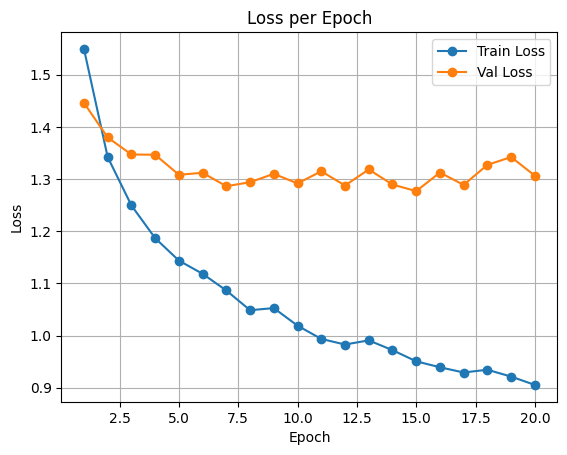

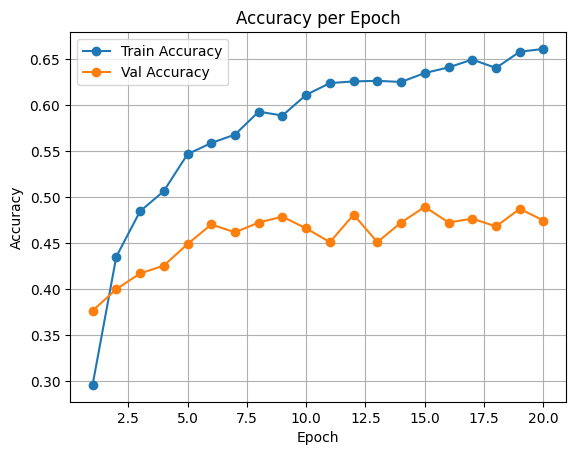

In [20]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [21]:
test_metrics = evaluate(model, test_loader_pretrained, criterion, prefix='test_')

test_Loss: 1.3358  test_Acc: 0.4831  test_Prec: 0.4632  test_Rec: 0.4889  test_F1: 0.4677  test_ROC-AUC: 0.7756


In [22]:
model_path = "./models/resnet18.pkl"

In [23]:
save_model(model, model_path)

In [28]:
model = load_model(model_path)

In [24]:
images, trues, preds = predict(model, test_loader_pretrained)

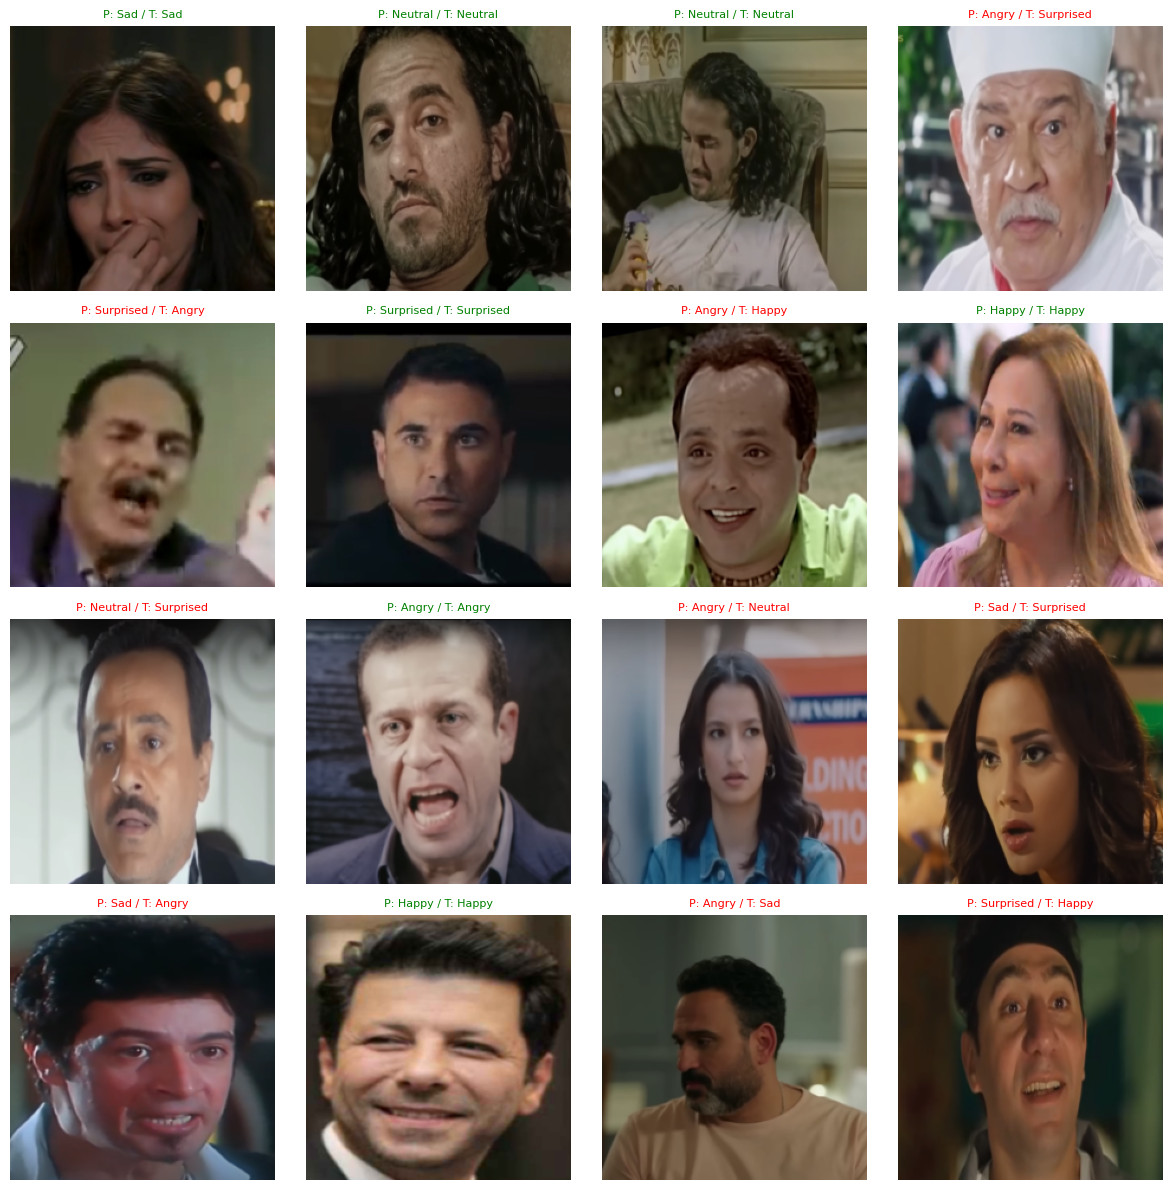

In [25]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])